### Preprocessing

In [11]:
# Get all the up to date data
from modules.update_data import update_data, clone_data

clone_data()
#update_data()

In [2]:
from modules.dataset_initialization import dataset_initialization
from modules.ids_formation import ids_formation
from modules.players_data import players_data
import pandas as pd
import pickle

PATH = '../data/Fantasy-Premier-League/data/'
PATH2 = '../data/FPL-ID-Map/Master.csv'

team_stats_dict, fixtures, players_raw, teams, ids, seasons = dataset_initialization(PATH)
id_dict_df = ids_formation(PATH, PATH2)
#id_dict_df = pd.read_csv(PATH2)
#id_dict_df[['19-20','20-21', '21-22', '22-23', 'understat']] = id_dict_df[['19-20','20-21', '21-22', '22-23', 'understat']].fillna(0.0).astype(int)

player_info_dict = players_data(id_dict_df, ids, PATH)
#with open('./created_datasets/player_info_dict.pkl', 'rb') as f:
#    player_info_dict = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../data/Fantasy-Premier-League/data/2023-24/understat/Joelinton_87.csv'

### Non-penalty goals

In [3]:
from modules.feature_extraction import npg_dataset_creation

# Create the npgoals dataset
gw_no_lim = 4
npg_dataset = npg_dataset_creation(seasons, players_raw, player_info_dict, teams, team_stats_dict, fixtures, gw_no_lim)
npg_dataset.to_csv('./created_datasets/npg_dataset538.csv', index=False)

100%|██████████| 484/484 [13:38<00:00,  1.69s/it]


Dataset size:  (52049, 16)


In [4]:
from modules.useful_functions2 import proj_scores, spis

proj_scores_df = pd.read_csv('soccer-spi/spi_matches.csv')
proj_scores_df = proj_scores_df[proj_scores_df['league_id']==2411]
spis(proj_scores_df, 'Arsenal', 'Man City', 2019, False)
proj_scores(proj_scores_df, 'Arsenal', 'Man City', 2019, False)

(0.77, 2.68)

{'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.016}
Mean Absolute Error = 0.23813054840787692
Mean Squared Error = 0.15250297094124468
Root Mean Squared Error = 0.39051628767728075
r2 = 0.1805206762255135

Mean Absolute Error = 0.25208678998093986
Mean Squared Error = 0.17933158948325997
Root Mean Squared Error = 0.42347560671573514
r2 = 0.1206672487222279
RMSE scores: [0.44228247 0.44311337 0.36149153 0.3672131  0.40857552]
Mean RMSE: 0.40453519854202546
Index(['npg_ratel100', 'npxGp90l100', 'sh_ratel100', 'npg_rate', 'npxGp90',
       'npxGp90(L4)', 'shp90', 'teamnpxGp90', 'opp_npxGAp90', 'opp_spi_team',
       'spi_team', 'minutes', 'was_home', 'npg'],
      dtype='object')


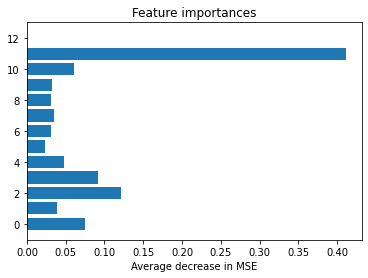

In [26]:
from modules.feature_extraction import npg_dataset_creation

# Create the npgoals dataset
gw_no_lim = 4
#npg_dataset = npg_dataset_creation(seasons, players_raw, player_info_dict, teams, team_stats_dict, fixtures, gw_no_lim)
#npg_dataset.to_csv('./created_datasets/npg_dataset538.csv', index=False)

from modules.model_creation import model_creation
import pandas as pd

#Get the dataset 
npg_dataset = pd.read_csv('./created_datasets/npg_dataset538.csv')
npg_dataset = npg_dataset.drop(['proj_goals', 'opp_proj_goals'], axis=1)
npg_dataset = npg_dataset[npg_dataset['npxGp90']>0.3]
npg_dataset = npg_dataset.dropna()
xgb_model = model_creation(npg_dataset, 13, 'xgb', [300,400,600,800], [2,3,4], [0.01, 0.012, 0.014, 0.016])

In [5]:
import pickle

filename = './models/npgoals_xgb_model6.sav'
model5 = pickle.load(open(filename, 'rb'))

In [35]:
npg_ratel100 = 0.9
npxGp90l100 = 0.88
sh_ratel100 = 3.61
npg_rate = 0.95
npxGp90 = 0.85
npxGp90l4 = 0.83
shp90 = 3.73 
teamnpxGp90 = 2.1
opp_npxGAp90 = 1
spi_opp = 65
spi = 90
minutes = 77
was_home = True

npg_ratel1002 = 0.63 
npxGp90l1002 = 0.62
sh_ratel1002 = 3.61
npg_rate2 = 0.45
npxGp902 = 0.53
npxGp90l42 = 0.55
shp902 = 3.14 
teamnpxGp902 = 2
opp_npxGAp902 = 1
spi_opp2 = 65
spi2 = 85
minutes2 = 84 
was_home2 = True

print('Haaland')
#print(xgb_model2.predict([[npg_ratel100, npxGp90l100, sh_ratel100, npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, minutes, was_home]]))
#print(xgb_model3.predict([[npg_ratel100, npxGp90l100, sh_ratel100, npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, minutes, was_home]]))
print(model5.predict([[npg_ratel100, npxGp90l100, sh_ratel100, npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, spi_opp, spi, minutes, was_home]]))
#print(model4.predict([[npg_ratel100, npxGp90l100, sh_ratel100, npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, spi_opp, spi, minutes, was_home]]))
print(xgb_model.predict([[npg_ratel100, npxGp90l100, sh_ratel100, npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, spi_opp, spi, minutes, was_home]]))
#print(xgb_model2.predict([[npg_rate, npxGp90, npxGp90l4, shp90, teamnpxGp90, opp_npxGAp90, minutes, was_home]]))
print()
print('Salah')
#print(xgb_model2.predict([[npg_ratel1002, npxGp90l1002, sh_ratel1002, npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, minutes2, was_home2]]))
#print(xgb_model3.predict([[npg_ratel1002, npxGp90l1002, sh_ratel1002, npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, minutes2, was_home2]]))
print(model5.predict([[npg_ratel1002, npxGp90l1002, sh_ratel1002, npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, spi_opp2, spi2, minutes2, was_home2]]))
#print(model4.predict([[npg_ratel1002, npxGp90l1002, sh_ratel1002, npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, spi_opp2, spi2, minutes2, was_home2]]))
print(xgb_model.predict([[npg_ratel1002, npxGp90l1002, sh_ratel1002, npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, spi_opp2, spi2, minutes2, was_home2]]))
#print(xgb_model2.predict([[npg_rate2, npxGp902, npxGp90l42, shp902, teamnpxGp902, opp_npxGAp902, minutes2, was_home2]]))

Haaland
[0.5374316]
[0.64694875]

Salah
[0.5802085]
[0.46259013]


In [19]:
import pickle

filename = './models/npgoals_xgb_model7.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

### Penalties

100%|██████████| 20/20 [01:43<00:00,  5.20s/it]


{'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.01}
Mean Absolute Error = 0.2069426461293479
Mean Squared Error = 0.11125139141524461
Root Mean Squared Error = 0.33354368741627327
r2 = 0.09553453530668987

Mean Absolute Error = 0.23361464172880025
Mean Squared Error = 0.137046950526048
Root Mean Squared Error = 0.3701985285303657
r2 = 0.009951001625142508
RMSE scores: [0.36048403 0.40483231 0.38454993 0.38363854 0.30697454]
Mean RMSE: 0.3680958704213359
Index(['team_npxG', 'oppteam_npxGA', 'was_home', 'pen_rate', 'proj_goals',
       'spi_team', 'spi_opp_team', 'team_npxGp90(L4)', 'oppteam_npxGAp90(L4)',
       'team_pens'],
      dtype='object')


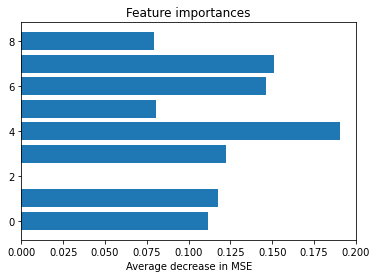

In [10]:
from modules.feature_extraction import penalties_dataset_creation
from modules.model_creation import model_creation
import pandas as pd

gw_no_limit = 4
pens_dataset = penalties_dataset_creation(seasons, fixtures, teams, team_stats_dict, gw_no_limit)
pens_dataset.to_csv('./created_datasets/pens_dataset538.csv', index=False)

#Get the dataset
pens_dataset = pd.read_csv('./created_datasets/pens_dataset538.csv')
#pens_dataset = pens_dataset.drop('pen_rate', axis=1)
pens_xgb_model2 = model_creation(pens_dataset, 9, 'xgb', [300, 400, 500, 600], [2,3,4])

In [87]:
import pickle

filename = './models/pens_xgb_model.sav'
pickle.dump(pens_xgb_model1, open(filename, 'wb'))

In [11]:
filename = './models/pens_xgb_model.sav'
pens = pickle.load(open(filename, 'rb'))

In [24]:
team_npxG = 2.1
oppteam_npxGA = 1.8
was_home = True 
pen_rate = 0.35
proj_goals = 2.2
spi_team = 90
spi_opp_team = 55
team_npxGp90l4 = 2.1
oppteam_npxGAp90l4 = 1.9

#print(pens_xgb_model.predict([[team_npxG, oppteam_npxGA, was_home, pen_rate, proj_goals, team_npxGp90l4, oppteam_npxGAp90l4]]))
print(pens.predict([[team_npxG, oppteam_npxGA, was_home, pen_rate, proj_goals, team_npxGp90l4, oppteam_npxGAp90l4]]))
print(pens_xgb_model2.predict([[team_npxG, oppteam_npxGA, was_home, pen_rate, proj_goals, spi_team, spi_opp_team, team_npxGp90l4, oppteam_npxGAp90l4]]))
#print(pens_xgb_model1.predict([[team_npxG, oppteam_npxGA, was_home, pen_rate, proj_goals, team_npxGp90l4, oppteam_npxGAp90l4]]))

[0.22384809]
[0.15933712]


In [88]:
from modules.useful_functions import xpens_2022

xpens_2022 

{'Arsenal': [(13, 1)],
 'Aston Villa': [(40, 0.4)],
 'Brentford': [(80, 1), (95, 0)],
 'Brighton': [(116, 0.98), (104, 0.02)],
 'Bournemouth': [(105, 1)],
 'Chelsea': [(130, 1), (142, 0)],
 'Crystal Palace': [(160, 1), (166, 0)],
 'Everton': [(191, 1)],
 'Leeds': [(227, 0), (225, 1)],
 'Leicester': [(255, 0.5), (259, 0.4), (261, 0.1)],
 'Liverpool': [(283, 1), (282, 0)],
 'Man City': [(318, 1), (303, 0)],
 'Man Utd': [(335, 0.75), (333, 0.25)],
 'Newcastle': [(356, 1), (354, 0)],
 "Nott'm Forest": [(315, 1)],
 'Southampton': [(407, 1)],
 'Spurs': [(427, 1), (428, 0)],
 'Fulham': [(210, 1), (346, 0)],
 'West Ham': [(464, 0.9), (465, 0.1)],
 'Wolves': [(476, 0.8), (480, 0.2)]}

In [2]:
xpens_2022['Man City']

[(318, 1), (303, 0)]

### Assists

In [44]:
from modules.feature_extraction import assists_dataset_creation

gw_no_lim = 4
#assists_dataset = assists_dataset_creation(seasons, player_info_dict, teams, players_raw, team_stats_dict, fixtures, gw_no_lim)
#assists_dataset.to_csv('./created_datasets/assists_dataset.csv', index=False)

100%|██████████| 426/426 [04:42<00:00,  1.51it/s]


Dataset size:  (47783, 14)


In [25]:
from modules.feature_extraction import assists_dataset_creation

gw_no_lim = 4
assists_dataset = assists_dataset_creation(seasons, player_info_dict, teams, players_raw, team_stats_dict, fixtures, gw_no_lim)
assists_dataset.to_csv('./created_datasets/assists_dataset538.csv', index=False)

100%|██████████| 433/433 [07:20<00:00,  1.02s/it]


Dataset size:  (51554, 15)


{'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.014}
Mean Absolute Error = 0.09615219910603438
Mean Squared Error = 0.05537788770965064
Root Mean Squared Error = 0.2353250681709253
r2 = 0.11350266494397343

Mean Absolute Error = 0.10008243871548374
Mean Squared Error = 0.05847443780136633
Root Mean Squared Error = 0.2418148833330288
r2 = 0.08964261882131741
RMSE scores: [0.25365492 0.24487537 0.23081092 0.23928428 0.23241326]
Mean RMSE: 0.24020774804319772
Index(['assist_ratel100', 'xAp90l100', 'kp_ratel100', 'assist_rate', 'xAp90',
       'xAp90(L4)', 'kpp90', 'teamnpxGp90', 'opp_npxGp90', 'spi_opp_team',
       'opp_npxGAp90', 'spi_team', 'minutes', 'was_home', 'assists'],
      dtype='object')


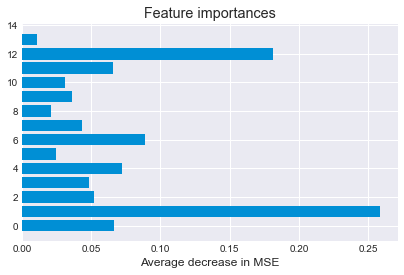

In [46]:
from modules.model_creation import model_creation
import pandas as pd

#Get the dataset
assists_dataset = pd.read_csv('./created_datasets/assists_dataset538.csv')
assists_dataset = assists_dataset[['assist_ratel100', 'xAp90l100', 'kp_ratel100', 'assist_rate', 'xAp90',
       'xAp90(L4)', 'kpp90', 'teamnpxGp90', 'opp_npxGp90', 'spi_opp_team',
       'opp_npxGAp90', 'spi_team', 'minutes', 'was_home', 'assists']]
axgb_model1 = model_creation(assists_dataset, 14, 'xgb', [200,300,400,600], [3,4,5,6], [0.01, 0.012, 0.014, 0.016])

In [28]:
assist_ratel100 = 0.24 
xAp90l100 = 0.23
kp_ratel100 = 2.6
assist_rate = 0.21
xAp90 = 0.38
xAp90l4 = 0.4
kpp90 = 2.62 
spi_team = 85
spi_opp = 60
teamnpxGp90 = 1.8
opp_npxGp90 = 1
opp_npxGAp90 = 1.7
minutes = 84 
was_home = True

assist_ratel1002 = 0.42
xAp90l1002 = 0.57
kp_ratel1002 = 3.6
assist_rate2 = 0.58
xAp902 = 0.59
xAp90l42 = 0.65
kpp902 = 3.52 
spi_team2 = 90
spi_opp2 = 60
teamnpxGp902 = 2.1
opp_npxGp902 = 1
opp_npxGAp902 = 1.65
minutes2 = 70
was_home2 = False

print('Bruno')
#print(assists2.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
#print(assists.predict([[xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
print(axgb_model1.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, spi_opp, opp_npxGAp90, spi_team, minutes, was_home]]))
#print(axgb_model6.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
#print(assists2.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
print()
print('KDB')
#print(assists2.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
#print(assists.predict([[xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
print(axgb_model1.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, spi_opp2, opp_npxGAp902, spi_team2, minutes2, was_home2]]))
#print(axgb_model6.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
#print(assists2.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))


Bruno
[0.2823267]

KDB
[0.47451156]


In [77]:
assist_ratel100 = 0.25
xAp90l100 = 0.32
kp_ratel100 = 2.4
assist_rate = 0.06
xAp90 = 0.33
xAp90l4 = 0.33
kpp90 = 2.16 
teamnpxGp90 = 2
opp_npxGp90 = 1
opp_npxGAp90 = 1.8
minutes = 81 
was_home = True

assist_ratel1002 = 0.14
xAp90l1002 = 0.26
kp_ratel1002 = 2.1
assist_rate2 = 0.2
xAp902 = 0.39
xAp90l42 = 0.39
kpp902 = 2.97 
teamnpxGp902 = 1.8
opp_npxGp902 = 1.8
opp_npxGAp902 = 0.8
minutes2 = 84 
was_home2 = True

print('TAA')
print(axgb_model1.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
print(assists.predict([[xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
print(assists2.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
#print(axgb_model6.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
#print(assists2.predict([[assist_ratel100, xAp90l100, kp_ratel100, assist_rate, xAp90, xAp90l4, kpp90, teamnpxGp90, opp_npxGp90, opp_npxGAp90, minutes, was_home]]))
print()
print('Trippier')
print(axgb_model1.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
print(assists.predict([[ xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
print(assists2.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
#print(axgb_model6.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))
#print(assists2.predict([[assist_ratel1002, xAp90l1002, kp_ratel1002, assist_rate2, xAp902, xAp90l42, kpp902, teamnpxGp902, opp_npxGp902, opp_npxGAp902, minutes2, was_home2]]))


TAA
[0.32780632]
[0.21941015]
[0.36353144]

Trippier
[0.23753595]
[0.31681734]
[0.22469221]


In [29]:
import pickle

filename = './models/assists_xgb_model3.sav'
pickle.dump(axgb_model1, open(filename, 'wb'))

### Team goals

In [2]:
from modules.feature_extraction import team_goals_dataset_creation

gw_no_lim = 4
team_goals_dataset = team_goals_dataset_creation(seasons, fixtures, teams, team_stats_dict, gw_no_lim)
team_goals_dataset.to_csv('./created_datasets/team_goals_dataset.csv', index=False)

{'n_estimators': 400, 'max_depth': 4}
Mean Absolute Error = 0.877909524441294
Mean Squared Error = 1.2839078805009725
Root Mean Squared Error = 1.1330965892195477
r2 = 0.19825278365747656

Mean Absolute Error = 0.9544495124937843
Mean Squared Error = 1.4948952007630927
Root Mean Squared Error = 1.2226590697177577
r2 = 0.08783561345745416
Index(['team1_npxG', 'team2_npxGA', 'was_home', 'team1_npxGp90(L4)',
       'team2_npxGAp90(L4)', 'team1_goals'],
      dtype='object')


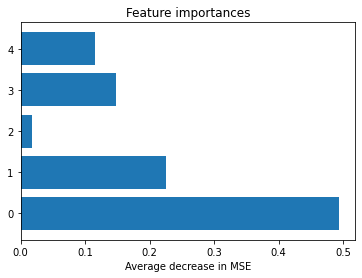

In [11]:
from modules.model_creation import model_creation
import pandas as pd

#Get the dataset
team_goals_dataset = pd.read_csv('./created_datasets/team_goals_dataset.csv')
team_goals_xgb_model = model_creation(team_goals_dataset, 5, 'xgb', [300,400,500,600], [2,3,4], [0.008, 0.01, 0.012])

In [28]:
import pickle

filename = './models/team_goals_xgb_model.sav'
pickle.dump(team_goals_xgb_model, open(filename, 'wb'))

### Bonus

In [3]:
from modules.feature_extraction import bps_dataset_creation

gw_no_lim = 4
bps_dataset = bps_dataset_creation(seasons, player_info_dict, teams, players_raw, team_stats_dict, fixtures, gw_no_lim)
bps_dataset.to_csv('./created_datasets/bps_dataset.csv', index=False)

100%|██████████| 430/430 [04:06<00:00,  1.74it/s]


{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}
Mean Absolute Error = 0.24864321314128135
Mean Squared Error = 0.2903319314110684
Root Mean Squared Error = 0.5388245831539875
r2 = 0.15096917214266214

Mean Absolute Error = 0.24567517831132055
Mean Squared Error = 0.28618606317229567
Root Mean Squared Error = 0.5349636092037435
r2 = 0.13240082089787253
Index(['bonusp90', 'position', 'npxGp90', 'xAp90', 'npxGAp90', 'opp_npxGp90',
       'opp_npxGAp90', 'minutes', 'was_home', 'bonus'],
      dtype='object')


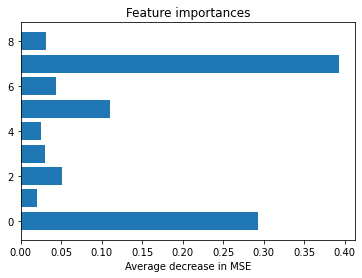

In [26]:
from modules.model_creation import model_creation
import pandas as pd

#Get the dataset
bps_dataset = pd.read_csv('./created_datasets/bps_dataset.csv')
bps_xgb_model2 = model_creation(bps_dataset, 9, 'xgb', [400,500,600,700], [3,4,5,6], [0.008, 0.01, 0.012])

In [64]:
import pickle

filename = './models/bps_xgb_model.sav'
pickle.dump(bps_xgb_model2, open(filename, 'wb'))

In [62]:
bonusp90 = 0.75
position = 3
npxGp90 = 0.17
xAp90 = 0.59 
npxGAp90 = 0.8 
opp_npxGp90 = 1.2
opp_npxGAp90 = 1.4 
minutes = 79
was_home = True

print(bps_xgb_model.predict([[bonusp90,position,npxGp90,xAp90,npxGAp90,opp_npxGp90,opp_npxGAp90,minutes,was_home]]))
print(bps_xgb_model1.predict([[bonusp90,position,npxGp90,xAp90,npxGAp90,opp_npxGp90,opp_npxGAp90,minutes,was_home]]))
print(bps_xgb_model2.predict([[bonusp90,position,npxGp90,xAp90,npxGAp90,opp_npxGp90,opp_npxGAp90,minutes,was_home]]))

[0.5506361]
[0.7412933]
[0.79441285]


### Saves

In [3]:
from modules.feature_extraction import saves_dataset_creation

gw_no_lim = 4
saves_dataset = saves_dataset_creation(seasons, player_info_dict, players_raw, teams, team_stats_dict, fixtures, gw_no_lim)
saves_dataset.to_csv('./created_datasets/saves_dataset.csv', index=False)

100%|██████████| 430/430 [01:59<00:00,  3.59it/s]


{'n_estimators': 700, 'max_depth': 2, 'learning_rate': 0.01}
Mean Absolute Error = 0.8319897286418387
Mean Squared Error = 1.8137962414026567
Root Mean Squared Error = 1.3467725277130718
r2 = 0.5823438862951176

Mean Absolute Error = 0.8701776131326193
Mean Squared Error = 1.9158874663350323
Root Mean Squared Error = 1.384155867789113
r2 = 0.5440027292501437
Index(['savesp90', 'opp_proj_goals', 'npxGAp90', 'opp_npxGp90', 'npxGAp90(L4)',
       'opp_npxGp90(L4)', 'minutes', 'was_home', 'saves'],
      dtype='object')


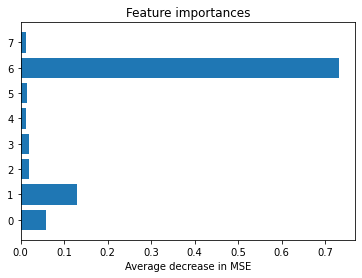

In [9]:
from modules.model_creation import model_creation
import pandas as pd

#Get the dataset
saves_dataset = pd.read_csv('./created_datasets/saves_dataset.csv')
saves_xgb_model4 = model_creation(saves_dataset, 8, 'xgb', [700], [2,3,4,5], [0.008, 0.01, 0.012, 0.014])

In [26]:
import pickle

filename = './models/saves_xgb_model.sav'
pickle.dump(saves_xgb_model3, open(filename, 'wb'))

In [25]:
from modules.useful_functions import save_points
save_points(-0.07)

-6.025343698222532e-05

In [24]:
spg = 1.5
opp_proj_goals = 0.55
npxGAp90 = 0.8 
opp_npxGp90 = 1
npxGAp90l4 = 0.8
opp_npxGp90l4 = 1
minutes = 18
was_home = True

print(saves_xgb_model.predict([[spg,opp_proj_goals,npxGAp90,opp_npxGp90,npxGAp90l4,opp_npxGp90l4,minutes,was_home]]))
print(saves_xgb_model1.predict([[spg,opp_proj_goals,npxGAp90,opp_npxGp90,npxGAp90l4,opp_npxGp90l4,minutes,was_home]]))
print(saves_xgb_model2.predict([[spg,opp_proj_goals,npxGAp90,opp_npxGp90,npxGAp90l4,opp_npxGp90l4,minutes,was_home]]))
print(saves_xgb_model3.predict([[spg,opp_proj_goals,npxGAp90,opp_npxGp90,npxGAp90l4,opp_npxGp90l4,minutes,was_home]]))
print(saves_xgb_model4.predict([[spg,opp_proj_goals,npxGAp90,opp_npxGp90,npxGAp90l4,opp_npxGp90l4,minutes,was_home]]))

[-0.07073015]
[-0.03735984]
[-0.11968241]
[-0.07841796]
[-0.02939505]


### SPIs

In [3]:
from modules.feature_extraction import spi_dataset_creation

matches_path = '../data/soccer-spi/spi_matches.csv'
data = spi_dataset_creation(matches_path)

{'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.014}
Mean Absolute Error = 0.27279525160188034
Mean Squared Error = 0.2023234549086289
Root Mean Squared Error = 0.44980379601402753
r2 = 0.9984584200654321

Mean Absolute Error = 0.3908267022621973
Mean Squared Error = 0.5435112012525961
Root Mean Squared Error = 0.737232121690717
r2 = 0.9958600801921503
RMSE scores: [0.81974779 0.64672034 0.60911424 0.89930695 0.50567115]
Mean RMSE: 0.6961120949706021
Index(['spi1', 'spi2', 'score1', 'score2', 'xg1', 'xg2', 'was_home',
       'next_spi'],
      dtype='object')


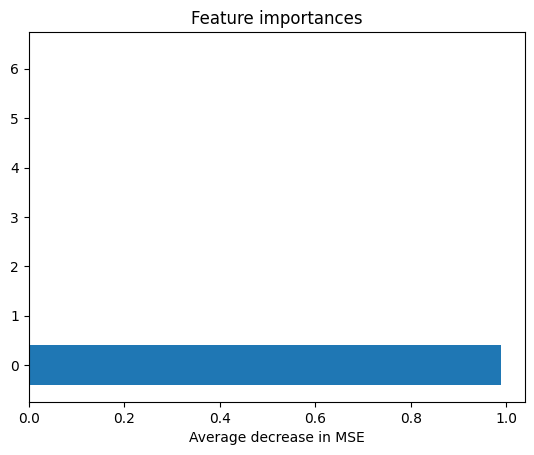

In [5]:
from modules.model_creation import model_creation
import pandas as pd

# Get the dataset
#saves_dataset = pd.read_csv('./created_datasets/saves_dataset.csv')
spi_model = model_creation(data, 7, 'xgb', [700], [2,3,4,5], [0.008, 0.01, 0.012, 0.014])

In [14]:
import pickle

filename = './models/spi_model.sav'
pickle.dump(spi_model, open(filename, 'wb'))

In [17]:
spi1 = 50
spi2 = 80 
score1 = 3
score2 = 0 
xg1 = 2.1 
xg2 = 0.82
was_home = True

print(spi_model.predict([[spi1, spi2, score1, score2, xg1, xg2, was_home]]))

[52.254787]


{'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.014}
Mean Absolute Error = 0.11313298237084746
Mean Squared Error = 0.02108192194342693
Root Mean Squared Error = 0.14519614989188567
r2 = 0.9273729586989763

Mean Absolute Error = 0.11705927160359864
Mean Squared Error = 0.02311824382120672
Root Mean Squared Error = 0.15204684745566652
r2 = 0.9184562622168847
RMSE scores: [0.20099993 0.16512377 0.15453644 0.15267035 0.16552181]
Mean RMSE: 0.16777045836130794
Index(['spi1', 'spi2', 'was_home', 'proj_goals'], dtype='object')


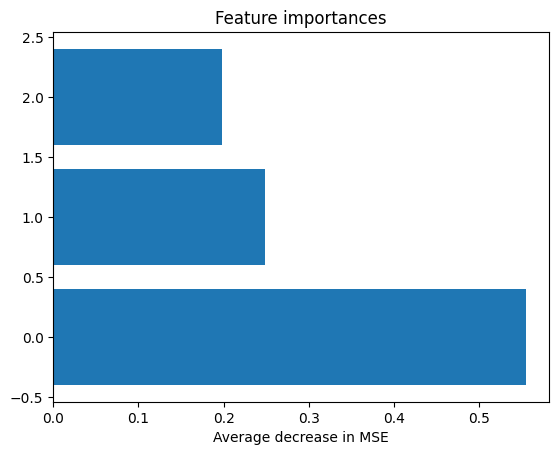

In [5]:
from modules.feature_extraction import proj_goals_dataset_creation

matches_path = '../data/soccer-spi/spi_matches.csv'
data = proj_goals_dataset_creation(matches_path)

from modules.model_creation import model_creation
import pandas as pd

proj_goals_model = model_creation(data, 3, 'xgb', [200, 300, 400], [2,3,4,5], [0.008, 0.01, 0.012, 0.014])

In [11]:
spi1 = 92
spi2 = 56 
was_home = True

print(proj_goals_model.predict([[spi1, spi2, was_home]]))

[2.8941996]


In [12]:
import pickle

filename = './models/proj_goals_model.sav'
pickle.dump(proj_goals_model, open(filename, 'wb'))

### endgame

In [36]:
import shutil
import os

# Remove old files
os.remove('../data/fplreview.csv')
os.remove('../data/review_detailed.csv')
os.remove('../data/soccer-spi.zip')
shutil.rmtree('../data/soccer-spi')


In [37]:
import zipfile

with zipfile.ZipFile('../data/soccer-spi.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/')

In [1]:
%%capture 
import nest_asyncio
nest_asyncio.apply()

from modules.dataset_initialization import dataset_initialization
from modules.ids_formation import ids_formation

PATH = '../data/Fantasy-Premier-League/data/'
PATH2 = '../data/FPL-ID-Map/Master.csv'

team_stats_dict, fixtures, players_raw, teams, ids, seasons = dataset_initialization(PATH)
#id_dict_df = ids_formation(PATH, PATH2)

# Get the saved models
import pickle
import pandas as pd

filename = './models/npgoals_xgb_model6.sav'
npgoals = pickle.load(open(filename, 'rb'))

filename = './models/assists_xgb_model3.sav'
assists = pickle.load(open(filename, 'rb'))

filename = './models/team_goals_xgb_model.sav'
team_goals = pickle.load(open(filename, 'rb'))

filename = './models/bps_xgb_model.sav'
bonus = pickle.load(open(filename, 'rb'))

filename = './models/saves_xgb_model.sav'
saves = pickle.load(open(filename, 'rb'))

filename = './models/pens_xgb_model.sav'
pens = pickle.load(open(filename, 'rb'))

filename = './models/spi_model.sav'
strengths = pickle.load(open(filename, 'rb'))

filename = './models/proj_goals_model.sav'
projected_goals = pickle.load(open(filename, 'rb'))

In [2]:
from modules.season_changes import produce_player_dfs, spis_from_season_beginning, get_next_gw
import requests

season = '2023-24'
master_path = '../data/FPL-ID-Map/Master.csv'
master = pd.read_csv(master_path)
horizon = 12
next_gw = get_next_gw()

review_detailed, review_df = produce_player_dfs(season, master_path, players_raw, teams, fixtures, horizon, next_gw)


# Compute the new SPIs
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
df = pd.DataFrame(requests.get(url).json()['events'])
spis = spis_from_season_beginning(strengths, teams, team_stats_dict, fixtures, season, df, next_gw)


727
693
726
721


In [3]:
from modules.useful_functions2 import compute_analytical_ev
import pandas as pd
from modules.season_changes import get_next_gw

#next_gw = get_next_gw()
gw_no_lim = 4

horizon = 12
review_horizon = 12
season = '2023-24'
'''
with open('spis.pkl', 'rb') as f:
        spis2023 = pickle.load(f)
'''
#data538_PATH = '../data/soccer-spi/spi_matches.csv'
#review_df = pd.read_csv('../data/fplreview.csv')
#review_df = review_df.loc[(review_df['ID']==19) |(review_df['ID']==14) |(review_df['ID']==12) |(review_df['ID']==5)| (review_df['ID']==405) |(review_df['ID']==416) |(review_df['ID']==415) |(review_df['ID']==433)]
#review_df = review_df.loc[(review_df['Team']=='Man Utd')].reset_index()
#master_path = '../data/FPL-ID-Map/Master.csv'
#review_df = review_df = review_df.loc[(review_df['ID']==373) |(review_df['ID']==396) |(review_df['ID']==390) |(review_df['ID']==379)| (review_df['ID']==597)]
master_path = 'master.csv'
#review_detailed = pd.read_csv('../data/review_detailed.csv') 

an_ev_df = compute_analytical_ev(next_gw, horizon, review_horizon, season, review_df, review_detailed, players_raw, ids, master_path, spis, fixtures, teams, team_stats_dict, npgoals, assists, team_goals, bonus, saves, strengths, projected_goals, pens, gw_no_lim, seasons)

c:\Users\spval\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
100%|██████████| 632/632 [26:37<00:00,  2.53s/it]


In [6]:
from modules.useful_functions2 import filter_df

ev_df = filter_df(an_ev_df, next_gw, horizon, '_Pts', 'total', an_ev_df.shape[0])
df = an_ev_df[an_ev_df['Pos']=='M']
df = an_ev_df
filter_df(df, next_gw, horizon, '_Pts', 'total', 30)

,Pos,ID,Name,BV,SV,Team,total,11_xMins,11_Pts,12_xMins,...,18_Pts,19_xMins,19_Pts,20_xMins,20_Pts,21_xMins,21_Pts,22_xMins,22_Pts,sum
149,M,308.0,Salah,128,128,Liverpool,85.682,87.0,8.686,87.0,...,6.162,87.0,8.474,87.0,5.904,87.0,7.750,87.0,6.591,85.683
86,M,516.0,Son,96,96,Spurs,81.023,77.0,6.693,77.0,...,7.212,77.0,6.029,77.0,7.773,77.0,6.539,77.0,6.659,81.024
59,F,433.0,Wilson,78,78,Newcastle,72.765,77.0,5.761,77.0,...,7.659,77.0,6.767,77.0,4.714,77.0,4.662,77.0,5.788,72.764
366,F,355.0,Haaland,140,140,Man City,71.191,88.0,7.386,88.0,...,0.000,88.0,6.174,88.0,8.197,88.0,4.933,88.0,8.045,71.192
367,M,19.0,Saka,86,86,Arsenal,69.095,84.0,5.175,84.0,...,5.366,84.0,6.000,84.0,5.837,84.0,6.024,84.0,6.023,69.095
228,M,504.0,Maddison,81,81,Spurs,68.165,80.0,5.584,80.0,...,6.008,80.0,5.178,80.0,6.505,80.0,5.683,80.0,5.563,68.164
242,M,526.0,Bowen,74,74,West Ham,64.197,84.0,4.764,84.0,...,5.098,84.0,4.532,84.0,4.600,84.0,6.418,84.0,5.655,64.198
477,M,108.0,Mbeumo,66,66,Brentford,60.674,83.0,5.751,83.0,...,0.000,83.0,5.979,83.0,5.416,83.0,5.984,83.0,4.910,60.675
492,M,143.0,Mitoma,65,65,Brighton,59.794,80.0,4.857,80.0,...,5.032,80.0,4.688,80.0,4.987,80.0,5.290,80.0,5.210,59.793
48,M,134.0,Groß,63,63,Brighton,59.377,78.0,4.773,78.0,...,4.914,78.0,4.591,78.0,4.907,78.0,5.310,78.0,5.268,59.378


In [7]:
ev_df.insert(3, 'value', [round(ev_df['total'].iloc[x]/ev_df['BV'].iloc[x],2) for x in range(ev_df.shape[0])])
ev_df.sort_values(by='value',ascending=False)[:20]

,Pos,ID,Name,value,BV,SV,Team,total,11_xMins,11_Pts,...,18_Pts,19_xMins,19_Pts,20_xMins,20_Pts,21_xMins,21_Pts,22_xMins,22_Pts,sum
329,D,311.0,Tsimikas,1.13,45,45,Liverpool,50.630,78.0,4.868,...,3.620,78.0,4.728,78.0,3.480,78.0,4.588,78.0,4.067,50.631
425,M,362.0,Palmer,1.11,50,50,Chelsea,55.551,77.0,4.188,...,5.001,77.0,4.928,77.0,5.418,77.0,4.973,77.0,4.094,55.552
259,M,557.0,Hwang,1.07,55,55,Wolves,59.017,75.0,6.173,...,4.604,75.0,4.461,75.0,4.905,75.0,4.215,75.0,4.723,59.016
81,G,524.0,Areola,1.05,43,43,West Ham,44.971,89.0,3.216,...,3.754,89.0,3.113,89.0,3.407,89.0,4.022,89.0,4.308,44.968
600,D,584.0,Pau,1.03,45,45,Aston Villa,46.554,84.0,4.251,...,5.384,84.0,3.578,84.0,5.199,84.0,3.877,84.0,3.163,46.554
104,D,419.0,Lascelles,1.02,40,40,Newcastle,40.829,80.0,3.028,...,4.034,80.0,4.743,80.0,2.544,80.0,2.272,80.0,2.749,40.827
67,G,275.0,Leno,1.02,47,47,Fulham,47.977,89.0,4.088,...,4.849,89.0,4.190,89.0,3.660,89.0,3.589,89.0,4.211,47.978
590,F,168.0,Foster,1.01,50,50,Burnley,50.653,75.0,4.330,...,4.325,75.0,3.702,75.0,3.843,75.0,5.207,75.0,3.601,50.652
355,M,661.0,Harrison,1.01,55,55,Everton,55.726,76.0,4.334,...,4.240,76.0,4.080,76.0,4.976,76.0,4.434,76.0,4.796,55.726
189,G,113.0,Raya,0.99,48,48,Arsenal,47.379,85.0,2.934,...,3.035,85.0,4.384,85.0,3.947,85.0,4.405,85.0,4.117,47.380


In [2]:
pr = players_raw['2023-24']
#727, 726,721,693
new_players = pr[pr['id']==122][['code', 'first_name', 'second_name', 'web_name', 'id']].reset_index()
new_players


,index,code,first_name,second_name,web_name,id
0,137,535818,Simon,Adingra,Adingra,122


c:\Users\spval\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


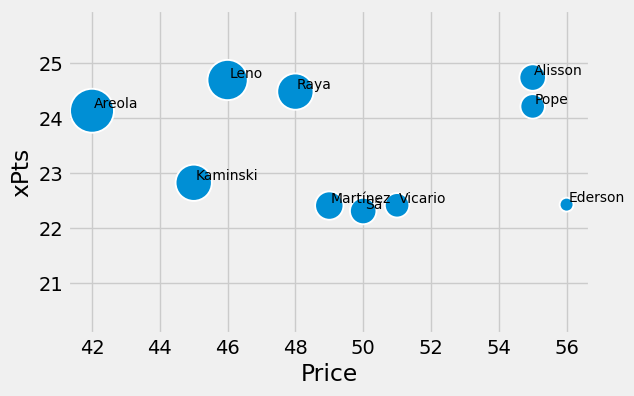

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['total'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [9]:
from modules.data_viz import best_options, barplots

#next_gw = 27
horizon = 6
num = 10

df = ev_df[ev_df['Pos']=='G']
#df = an_ev_df
best_options(df, next_gw, horizon, num)

ids_list = filter_df(df, next_gw, horizon, '_Pts', 'sum', num)['ID'].to_list()
barplots(an_ev_df, next_gw, horizon, ids_list)

In [9]:
#ev_df = ev_df.drop(['total', 'sum', 'value'], axis=1)
ev_df.to_csv('alex-GW11.csv', index=False)

In [10]:
import pandas as pd

df = pd.read_csv('../Projections/ALEX-23/alex-GW9.csv')
df = df[['Pos', 'ID', 'Name', '9_Pts']]
df.to_csv('utd.csv')

### Tests

In [83]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def results(df, start_gw, end_gw):
    df = df[(df['gw'] >= start_gw)  & (df['gw'] <= end_gw)]
    n = df.shape[0]
    print('Samples', n)
    y_true = df['rP'].to_list()
    y_pred = df['pP'].to_list()
    y_true_mins = df['rMin'].to_list()
    y_true_mins = df['pMin'].to_list()

    print('RMSE points: ', mean_squared_error(y_true, y_pred, squared=False))
    print('MAE points: ', mean_absolute_error(y_true, y_pred))
    print('R2 Score: ', r2_score(y_true, y_pred))

def model_perf(final, start_gw, end_gw):
    print('Review Premium')
    review_premium = final[final['source']=='review-premium']
    results(review_premium, start_gw, end_gw)
    print()
    print('Review Free')
    review_free = final[final['source']=='review-free']
    results(review_free, start_gw, end_gw)
    print()
    print('Review Odds')
    review_mop = final[final['source']=='review-market-odds-planner']
    results(review_mop, start_gw, end_gw)
    print()
    print('Mikkel')
    mikkel = final[final['source']=='mikkel']
    results(mikkel, start_gw, end_gw)
    print()
    print('Kiwi')
    kiwi = final[final['source']=='kiwi']
    results(kiwi, start_gw, end_gw)
    print()
    print('FFFix')
    fffix = final[final['source']=='fffix']
    results(fffix, start_gw, end_gw)
    print()
    print('FFHub')
    ffhub = final[final['source']=='ffhub']
    results(ffhub, start_gw, end_gw)
    print()
    print('FFScout')
    ffscout = final[final['source']=='ffscout']
    results(ffscout, start_gw, end_gw)
    print()


In [64]:
import pandas as pd

final = pd.read_csv('../final.csv')
final = final.loc[:, ~final.columns.str.contains('^Unnamed')]
review_premium = final[final['source']=='review-premium']
results(review_premium, 26, 38)

Samples 9971
RMSE points:  1.8849245841930855
MAE points:  0.9020983853174206
R2 Score:  0.415727040491803


In [66]:
import pandas as pd

final = pd.read_csv('../final.csv')
final = final.loc[:, ~final.columns.str.contains('^Unnamed')]
final = final[final['rMin']>0]
#final = final[final['id'] == 303]
#final = final[final['pP']>0]
model_perf(final, 26, 38)

Review Premium
Samples 3813
RMSE points:  2.926411500477762
MAE points:  1.9798520849724628
R2 Score:  0.16099933476331996

Review Free
Samples 3813
RMSE points:  2.9309155781338005
MAE points:  1.985609493836874
R2 Score:  0.1584147138072397

Review Odds
Samples 3810
RMSE points:  2.9261430186987214
MAE points:  1.9879160104986875
R2 Score:  0.16154530493596186

Mikkel
Samples 3813
RMSE points:  3.0084433329713844
MAE points:  2.0953422501966954
R2 Score:  0.1133031073591605

Kiwi
Samples 1111
RMSE points:  2.8834041126767898
MAE points:  2.0033267759964
R2 Score:  0.09291849977374822

FFFix
Samples 3810
RMSE points:  3.01702861205109
MAE points:  2.0424849829396328
R2 Score:  0.10865186380269842

FFHub
Samples 3809
RMSE points:  3.0325189725928214
MAE points:  2.172134284112905
R2 Score:  0.09961576092864655

FFScout
Samples 3771
RMSE points:  2.9429814390731805
MAE points:  1.9842482100238663
R2 Score:  0.15726128370426928



In [67]:
import pandas as pd

alex_list = []
for i in range(26,39):
    final = pd.read_csv('../final.csv')
    final = final.loc[:, ~final.columns.str.contains('^Unnamed')]
    final = final[final['gw']==i]
    rp = final[final['source']=='review-premium']
    rp = rp[['id', 'rP', 'rMin']]

    alex_gw = pd.read_csv('../Projections/ALEX/alex-GW' + str(i) + '.csv')
    alex_gw = alex_gw[['ID', 'Team', 'Name', 'Pos', str(i)+'_Pts', str(i)+'_xMins']]
    alex_gw.insert(4, 'gw', [i]*alex_gw.shape[0], True)
    alex_gw.rename(columns={'ID':'id', str(i)+'_Pts':'pP', str(i)+'_xMins':'pMin'}, inplace=True)
    alex_list.append(alex_gw.merge(rp, on='id', how='inner'))
alex = pd.concat(alex_list)
alex[['id', 'gw', 'pP', 'pMin', 'rP', 'rMin']] = alex[['id', 'gw', 'pP', 'pMin', 'rP', 'rMin']].apply(pd.to_numeric)
# optimizations
alex[['pP', 'pMin']] = alex[['pP', 'pMin']].clip(lower=0)
for i in range(alex.shape[0]):
    xmins = alex['pMin'].iloc[i]
    #until gw34 - from 35 it's good
    if xmins < 30:
        alex['pP'].iloc[i] = alex['pP'].iloc[i] - 1 + 0.033*xmins
    if xmins==0:
        alex['pP'].iloc[i] = 0
    if alex['pP'].iloc[i] < 0:
        alex['pP'].iloc[i] = 0

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [68]:
import pandas as pd

rev_list = []
for i in range(26,39):
    final = pd.read_csv('../final.csv')
    final = final.loc[:, ~final.columns.str.contains('^Unnamed')]
    final = final[final['gw']==i]
    rp = final[final['source']=='review-premium']
    rp = rp[['id', 'rP', 'rMin']]

    rev = pd.read_csv('../Projections/REVIEW-PREMIUM/fplreview_premium-GW' + str(i) + '.csv')
    rev = rev[['ID', 'Team', 'Name', 'Pos', str(i)+'_Pts', str(i)+'_xMins']]
    rev.insert(4, 'gw', [i]*rev.shape[0], True)
    rev.rename(columns={'ID':'id', str(i)+'_Pts':'pP', str(i)+'_xMins':'pMin'}, inplace=True)
    rev_list.append(rev.merge(rp, on='id', how='inner'))
rev_premium = pd.concat(rev_list)
rev_premium[['id', 'gw', 'pP', 'pMin', 'rP', 'rMin']] = rev_premium[['id', 'gw', 'pP', 'pMin', 'rP', 'rMin']].apply(pd.to_numeric)

In [69]:
import pandas as pd

final = pd.read_csv('../final.csv')
final = final.loc[:, ~final.columns.str.contains('^Unnamed')]
rp = final[final['source']=='review-premium']
rf = final[final['source']=='review-free']
mk = final[final['source']=='mikkel']
fix = final[final['source']=='fffix']
scout = final[final['source']=='ffscout']
hub = final[final['source']=='ffhub']
kw = final[final['source']=='kiwi']
aux = alex[['id', 'gw']]
review_premium = rp.merge(aux, on=['id', 'gw'], how='inner')
review_free = rf.merge(aux, on=['id', 'gw'], how='inner')
mikkel = mk.merge(aux, on=['id', 'gw'], how='inner')
fffix = fix.merge(aux, on=['id', 'gw'], how='inner')
ffscout = scout.merge(aux, on=['id', 'gw'], how='inner')
ffhub = hub.merge(aux, on=['id', 'gw'], how='inner')
kiwi = kw.merge(aux, on=['id', 'gw'], how='inner')


In [96]:
#kiwi comparison

aux = kiwi[['id', 'gw']]
alx = alex.merge(aux, on=['id', 'gw'], how='inner')
s = 0
e = 180
alx_aux = alx[(alx['rMin']>=s) & (alx['rMin']<=e)]
kiwi_aux = kiwi[(kiwi['rMin']>=s) & (kiwi['rMin']<=e)]

results(alx_aux, 26, 38)
results(kiwi_aux, 26, 38)

Samples 2317
RMSE points:  2.0934647436044194
MAE points:  1.1282952093223997
R2 Score:  0.33090624560804605
Samples 2317
RMSE points:  2.1211723314874606
MAE points:  1.205795464984031
R2 Score:  0.31307775501963175


until 33 if we include kiwi

In [214]:
#ffhub comparison

aux1 = ffhub[['id', 'gw']]
aux2 = ffscout[['id', 'gw']]
#aux3 = kiwi[['id', 'gw']]
aux4 = rev_premium[['id', 'gw']]
aux5 = fffix[['id', 'gw']]
aux6 = mikkel[['id', 'gw']]
aux = aux1.merge(aux2, on=['id', 'gw'], how='inner')
#aux = aux.merge(aux3, on=['id', 'gw'], how='inner')
aux = aux.merge(aux4, on=['id', 'gw'], how='inner')
aux = aux.merge(aux5, on=['id', 'gw'], how='inner')
aux = aux.merge(aux6, on=['id', 'gw'], how='inner')

alx = alex.merge(aux, on=['id', 'gw'], how='inner')
ffh = ffhub.merge(aux, on=['id', 'gw'], how='inner')
kw = kiwi.merge(aux, on=['id', 'gw'], how='inner')
fff = fffix.merge(aux, on=['id', 'gw'], how='inner')
rev = rev_premium.merge(aux, on=['id', 'gw'], how='inner')
mt = mikkel.merge(aux, on=['id', 'gw'], how='inner')
ffs = ffscout.merge(aux, on=['id', 'gw'], how='inner').drop_duplicates()


s = 1
e = 180
alx_aux = alx[(alx['rMin']>=s) & (alx['rMin']<=e)]
ffhub_aux = ffh[(ffh['rMin']>=s) & (ffh['rMin']<=e)]
ffscout_aux = ffs[(ffs['rMin']>=s) & (ffs['rMin']<=e)]
kiwi_aux = kw[(kw['rMin']>=s) & (kw['rMin']<=e)]
fffix_aux = fff[(fff['rMin']>=s) & (fff['rMin']<=e)]
mikkel_aux = mt[(mt['rMin']>=s) & (mt['rMin']<=e)]
review_aux = rev[(rev['rMin']>=s) & (rev['rMin']<=e)]

results(alx_aux, 26, 38)
results(ffhub_aux, 26, 38)
results(ffscout_aux, 26, 38)
results(kiwi_aux, 26, 38)
results(fffix_aux, 26, 38)
results(mikkel_aux, 26, 38)
results(review_aux, 26, 38)

Samples 3771
RMSE points:  3.004641085207163
MAE points:  2.025942720763723
R2 Score:  0.12157820436107658
Samples 3771
RMSE points:  3.048789909516819
MAE points:  2.18364705219976
R2 Score:  0.0955742952759362
Samples 3771
RMSE points:  2.9429814390731805
MAE points:  1.9842482100238663
R2 Score:  0.15726128370426928
Samples 1100
RMSE points:  2.8440241860721835
MAE points:  1.9746427895354546
R2 Score:  0.10253164841531803
Samples 3771
RMSE points:  3.0302006669072394
MAE points:  2.0548400066295414
R2 Score:  0.10656969610265854
Samples 3771
RMSE points:  3.0315817588765634
MAE points:  2.1127578891540706
R2 Score:  0.10575510278259592
Samples 3771
RMSE points:  2.9494156390782305
MAE points:  1.9986422699549191
R2 Score:  0.15357231931955373


In [100]:
#ffscout comparison

aux = ffscout[['id', 'gw']]
alx = alex.merge(aux, on=['id', 'gw'], how='inner')
s = 0
e = 90
alx_aux = alx[(alx['rMin']>=s) & (alx['rMin']<=e)]
ffscout_aux = ffscout[(ffscout['rMin']>=s) & (ffscout['rMin']<=e)]

results(alx_aux, 26, 38)
results(ffscout_aux, 26, 38)

Samples 6673
RMSE points:  2.183534478779985
MAE points:  1.202302112992657
R2 Score:  0.2544442118231274
Samples 6673
RMSE points:  2.1708227558082034
MAE points:  1.255032219391578
R2 Score:  0.2630996391433613


**Notes**

30-60 pMin players better than review

70-90 pMin players review is better

In [14]:
alex.sort_values(by='pP', ascending=False)

,id,Team,Name,Pos,gw,pP,pMin,rP,rMin
0,318,Man City,Haaland,F,34,11.717,75,16,180
4,283,Liverpool,Salah,M,34,11.544,80,18,173
0,333,Man Utd,Fernandes,M,37,11.389,87,11,175
8,301,Man City,De Bruyne,M,34,10.294,71,0,0
1,124,Brighton,Mitoma,M,29,10.134,77,14,180
...,...,...,...,...,...,...,...,...,...
555,735,Leicester,Marçal-Madivadua,M,33,0.000,0,0,0
554,653,Chelsea,Hutchinson,M,33,0.000,0,0,0
553,654,Crystal Palace,Wells-Morrison,M,33,0.000,2,0,0
552,719,Brighton,Ayari,M,33,0.000,11,0,0


In [93]:
'''
#HAULS/BLANKS
haul = 6
alex_aux = alex[alex['rP']>=haul]
rev_premium_aux = rev_premium[rev_premium['rP']>=haul]
review_premium_aux = review_premium[review_premium['rP']>=haul]
review_free_aux = review_free[review_free['rP']>=haul]
mikkel_aux = mikkel[mikkel['rP']>=haul]
fffix_aux = fffix[fffix['rP']>=haul]
'''
s = 0
e = 91
alex_aux = alex[(alex['pMin']>=s) & (alex['pMin']<=e)]
rev_premium_aux = rev_premium[(rev_premium['pMin']>=s) & (rev_premium['pMin']<=e)]
review_premium_aux = review_premium[(review_premium['pMin']>=s) & (review_premium['pMin']<=e)]
review_free_aux = review_free[(review_free['pMin']>=s) & (review_free['pMin']<=e)]
mikkel_aux = mikkel[(mikkel['pMin']>=s) & (mikkel['pMin']<=e)]
fffix_aux = fffix[(fffix['pMin']>=s) & (fffix['pMin']<=e)]
'''
#BY MINUTES
s = 0
e = 90
alex_aux = alex[(alex['rMin']>=s) & (alex['rMin']<=e)]
rev_premium_aux = rev_premium[(rev_premium['rMin']>=s) & (rev_premium['rMin']<=e)]
review_premium_aux = review_premium[(review_premium['rMin']>=s) & (review_premium['rMin']<=e)]
review_free_aux = review_free[(review_free['rMin']>=s) & (review_free['rMin']<=e)]
mikkel_aux = mikkel[(mikkel['rMin']>=s) & (mikkel['rMin']<=e)]
fffix_aux = fffix[(fffix['rMin']>=s) & (fffix['rMin']<=e)]
'''
'''
#BY POSITION
pos = 'F'
alex_aux = alex[alex['Pos']==pos]
rev_premium_aux = rev_premium[rev_premium['Pos']==pos]
review_premium_aux = review_premium[review_premium['Pos']==pos]               
'''
'''
#BIG HITTERS
alex_aux = alex[(alex['id']==318) | (alex['id']==283) | (alex['id']==124) | (alex['id']==427) | (alex['id']==357) | (alex['id']==133) | (alex['id']==13)]
rev_premium_aux = rev_premium[(rev_premium['id']==318) | (rev_premium['id']==283) | (rev_premium['id']==124) | (rev_premium['id']==427) | (rev_premium['id']==357) | (rev_premium['id']==133) | (rev_premium['id']==13)]
review_premium_aux = review_premium[(review_premium['id']==318) | (review_premium['id']==283) | (review_premium['id']==124) | (review_premium['id']==427) | (review_premium['id']==357) | (review_premium['id']==133) | (review_premium['id']==13)]
mikkel_aux = mikkel[(mikkel['id']==318) | (mikkel['id']==283) | (mikkel['id']==124) | (mikkel['id']==427) | (mikkel['id']==357) | (mikkel['id']==133) | (mikkel['id']==13)]
fffix_aux = fffix[(fffix['id']==318) | (fffix['id']==283) | (fffix['id']==124) | (fffix['id']==427) | (fffix['id']==357) | (fffix['id']==133) | (fffix['id']==13)]
'''
'''
#BY TEAM
team = 'Man City'
alex_aux = alex[alex['Team']==team]
rev_premium_aux = rev_premium[rev_premium['Team']==team]
review_premium_aux = review_premium[review_premium['Team']==team] 
'''
start_gw = 26
end_gw = 38
print('ALEX')
results(alex_aux, start_gw, end_gw)
print()
print('REVIEW PREMIUM WITH THE SAME MINS')
results(rev_premium_aux, start_gw, end_gw)
print()
print('REVIEW PREMIUM')
results(review_premium_aux, start_gw, end_gw)
print()
print('REVIEW FREE')
results(review_free_aux, start_gw, end_gw)
print()
print('MIKKEL')
results(mikkel_aux, start_gw, end_gw)
print()
print('FFFIX')
results(fffix_aux, start_gw, end_gw)

ALEX
Samples 9846
RMSE points:  1.9287004581694598
MAE points:  0.9101835263050987
R2 Score:  0.39427964043470054

REVIEW PREMIUM WITH THE SAME MINS
Samples 9846
RMSE points:  1.9016834647227703
MAE points:  0.9166016656510259
R2 Score:  0.4111304948898815

REVIEW PREMIUM
Samples 9846
RMSE points:  1.8967144468984594
MAE points:  0.9128547633556775
R2 Score:  0.4142038561826602

REVIEW FREE
Samples 9846
RMSE points:  1.9011202162622136
MAE points:  0.9167061750964858
R2 Score:  0.4114792708341659

MIKKEL
Samples 9846
RMSE points:  1.9452137336633057
MAE points:  0.9269043266301035
R2 Score:  0.3838630442760437

FFFIX
Samples 9846
RMSE points:  1.9789291441022925
MAE points:  0.965181766199472
R2 Score:  0.36231956383292374


### Graphs

In [29]:
import pandas as pd

npg_dataset_final = pd.read_csv('./created_datasets/npg_dataset.csv')
assists_dataset = pd.read_csv('./created_datasets/assists_dataset538.csv')
pens_dataset = pd.read_csv('./created_datasets/pens_dataset.csv')
saves_dataset = pd.read_csv('./created_datasets/saves_dataset.csv')
bps_dataset = pd.read_csv('./created_datasets/bps_dataset.csv')


In [36]:
bps_dataset

,bonusp90,position,npxGp90,xAp90,npxGAp90,opp_npxGp90,opp_npxGAp90,minutes,was_home,bonus
0,0.000000,3,0.047185,0.021487,1.603144,1.240624,1.193515,85,False,0
1,0.000000,3,0.058353,0.029282,1.628964,0.811236,1.841220,88,False,0
2,0.000000,3,0.176132,0.060163,1.601297,2.022634,0.946348,82,True,0
3,0.000000,3,0.151468,0.059391,1.619451,1.368077,1.051573,58,False,0
4,0.000000,3,0.137636,0.053967,1.679854,1.457483,1.170328,22,True,0
...,...,...,...,...,...,...,...,...,...,...
47538,0.400000,1,0.000000,0.000000,1.283912,1.081400,1.590443,90,False,0
47539,0.375000,1,0.000000,0.000000,1.280326,1.548264,1.137279,90,True,0
47540,0.352941,1,0.000000,0.000000,1.348970,1.102438,1.352085,90,False,0
47541,0.333333,1,0.000000,0.000000,1.331375,1.026986,1.105956,90,True,3


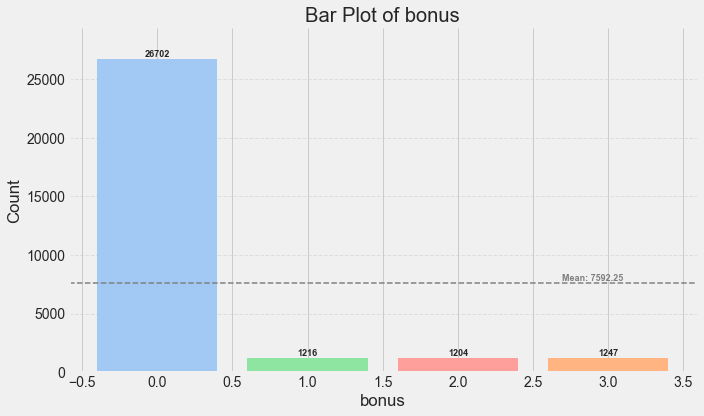

In [37]:
from modules.graphs  import count_barplot
bps_dataset_aux = bps_dataset[bps_dataset['minutes']>0]
count_barplot(bps_dataset_aux['bonus'].value_counts(), 'bonus')

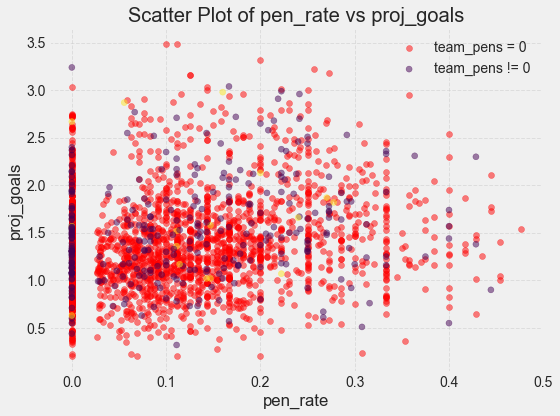

In [23]:
from modules.graphs  import scatterplot

pens_dataset_aux = pens_dataset[pens_dataset['pen_rate']<0.5]
scatterplot(pens_dataset_aux, 'pen_rate', 'proj_goals', 'team_pens')

In [ ]:
from modules.graphs  import scatterplot

assists_dataset_aux = assists_dataset[(assists_dataset['xAp90l100']<0.7) & (assists_dataset['assist_ratel100']<0.7)]
scatterplot(pens_dataset, 'pen_rate', 'spi_opp_team', 'team_pens')

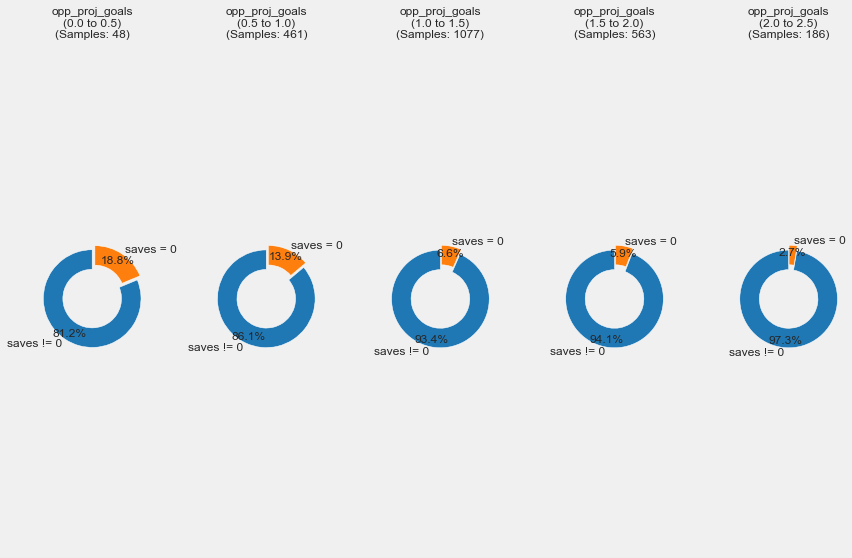

In [35]:
from modules.graphs  import plot_percentages

saves_dataset_aux = saves_dataset[saves_dataset['minutes']>0]
plot_percentages(saves_dataset_aux, 'opp_proj_goals', 0, 2.5, 0.5, 'saves')